## Hakathon

**16/10/2024




In [1]:
##importing csv files and help packages -> EXPLORATORY ANALYSIS
from IPython.display import IFrame # import iFrame
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import pysal as ps
from pysal.lib import weights
from pysal.explore import esda
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
from libpysal.io import open as psopen
from libpysal.weights import DistanceBand 
import geopandas as gpd
import contextily as ctx
import time
import warnings
warnings.filterwarnings('ignore')
import statsmodels
from sklearn.model_selection import train_test_split
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

c:\Users\maaik\AppData\Local\Programs\Python\Python312\Lib\site-packages\spaghetti\network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)
c:\Users\maaik\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#importing all our relevant data
h= pd.read_excel('C:/Users/maaik/Downloads/HackathonData/Housing.xlsx')
s= pd.read_excel('C:/Users/maaik/Downloads/HackathonData/Socio-economic status.xlsx')
pop= pd.read_excel('C:/Users/maaik/Downloads/HackathonData/Population.xlsx')
par= pd.read_excel('C:/Users/maaik/Downloads/HackathonData/Participation.xlsx')




In [3]:
# Select specific columns by their names in Housing file
h_selected = h[['Area code', 'Living space: % 100 m2+', 'Average number of residents']]

# Display the DataFrame with only the selected columns
print(h_selected.head())

  Area code  Living space: % 100 m2+  Average number of residents
0        AA                     19.1                         1.62
1        AB                     11.1                         1.47
2        AC                     38.8                         1.47
3        AD                     14.9                         1.35
4        AE                     18.1                         1.52


In [4]:
# Select specific columns by their names in the socio-economic status file
s_selected = s[['Area code','SES high (%)', 'Social cohesion (1-10)']]

# Display the DataFrame with only the selected columns
print(s_selected.head())

  Area code  SES high (%) Social cohesion (1-10)
0        AA            49                    6.2
1        AB            49                    6.2
2        AC            63                      6
3        AD            53                    5.4
4        AE            49                    5.6


In [5]:
# Select specific columns by their names in the Population file
pop_selected = pop[['Area code', 'Migration background: % none', 'Migration background: % European (excl the Netherlands)','Households: % with children','Duration  of residence']]

# Display the DataFrame with only the selected columns
print(pop_selected.head())

  Area code  Migration background: % none  \
0        AA                          54.3   
1        AB                          55.0   
2        AC                          52.2   
3        AD                          43.5   
4        AE                          46.9   

   Migration background: % European (excl the Netherlands)  \
0                                               18.3         
1                                               20.3         
2                                               24.0         
3                                               29.7         
4                                               27.2         

   Households: % with children Duration  of residence  
0                         16.7                    9.6  
1                         12.7                    9.7  
2                         12.5                    7.9  
3                          6.6                    5.5  
4                          7.8                      6  


In [6]:
# Select specific columns by their names in the Social Infrastructure file
par_selected = par[['Area code', 'Health care facilities per 1.000 residents']]

# Display the DataFrame with only the selected columns
print(par_selected.head())

  Area code  Health care facilities per 1.000 residents
0        AA                                        11.6
1        AB                                         9.7
2        AC                                        18.5
3        AD                                        10.4
4        AE                                         8.4


In [7]:
merge_h_s= pd.merge(h_selected, s_selected, on='Area code', how='inner')
merge_h_s

,Area code,Living space: % 100 m2+,Average number of residents,SES high (%),Social cohesion (1-10)
0,AA,19.1,1.62,49,6.2
1,AB,11.1,1.47,49,6.2
2,AC,38.8,1.47,63,6
3,AD,14.9,1.35,53,5.4
4,AE,18.1,1.52,49,5.6
...,...,...,...,...,...
101,TH,24.6,2.41,24,6.2
102,TJ,13.1,2.22,18,5.9
103,TK,11.5,1.83,36,6.2
104,TL,11.7,2.10,25,6


In [8]:
merge_pop_par= pd.merge(pop_selected, par_selected, on='Area code', how='inner')
merge_pop_par

# here we get one row less because 'inner' determines that only if the Area code exists in both files the row is kept. Participation had 1 neighborhood less in the first place.

,Area code,Migration background: % none,Migration background: % European (excl the Netherlands),Households: % with children,Duration of residence,Health care facilities per 1.000 residents
0,AA,54.3,18.3,16.7,9.6,11.6
1,AB,55.0,20.3,12.7,9.7,9.7
2,AC,52.2,24.0,12.5,7.9,18.5
3,AD,43.5,29.7,6.6,5.5,10.4
4,AE,46.9,27.2,7.8,6,8.4
...,...,...,...,...,...,...
100,TH,19.4,6.1,38.2,7.7,4.2
101,TJ,24.1,6.1,38.2,11.9,4.0
102,TK,42.0,17.0,20.4,9.9,4.6
103,TL,29.4,8.8,29.8,11.3,4.8


In [9]:
merge_dataframe= pd.merge(merge_h_s, merge_pop_par, on='Area code', how='inner')
merge_dataframe

,Area code,Living space: % 100 m2+,Average number of residents,SES high (%),Social cohesion (1-10),Migration background: % none,Migration background: % European (excl the Netherlands),Households: % with children,Duration of residence,Health care facilities per 1.000 residents
0,AA,19.1,1.62,49,6.2,54.3,18.3,16.7,9.6,11.6
1,AB,11.1,1.47,49,6.2,55.0,20.3,12.7,9.7,9.7
2,AC,38.8,1.47,63,6,52.2,24.0,12.5,7.9,18.5
3,AD,14.9,1.35,53,5.4,43.5,29.7,6.6,5.5,10.4
4,AE,18.1,1.52,49,5.6,46.9,27.2,7.8,6,8.4
...,...,...,...,...,...,...,...,...,...,...
100,TH,24.6,2.41,24,6.2,19.4,6.1,38.2,7.7,4.2
101,TJ,13.1,2.22,18,5.9,24.1,6.1,38.2,11.9,4.0
102,TK,11.5,1.83,36,6.2,42.0,17.0,20.4,9.9,4.6
103,TL,11.7,2.10,25,6,29.4,8.8,29.8,11.3,4.8


In [10]:
null_counts = merge_dataframe.isnull().sum()
print(null_counts)
#One missing value in column Area code, problem is it reads the Area code NA as a missing value (NaN), so let's change that

Area code                                                  1
Living space: % 100 m2+                                    0
Average number of residents                                0
SES high (%)                                               0
Social cohesion (1-10)                                     0
Migration background: % none                               0
Migration background: % European (excl the Netherlands)    0
Households: % with children                                0
Duration  of residence                                     0
Health care facilities per 1.000 residents                 0
dtype: int64


In [11]:
# Display rows where 'Area code' is missing
missing_area_code_rows = merge_dataframe[merge_dataframe['Area code'].isna()]
# Show the result
print(missing_area_code_rows)

   Area code  Living space: % 100 m2+  Average number of residents  \
77       NaN                     21.3                         2.39   

    SES high (%) Social cohesion (1-10)  Migration background: % none  \
77            31                      6                          53.5   

    Migration background: % European (excl the Netherlands)  \
77                                               10.1         

    Households: % with children Duration  of residence  \
77                         38.0                   12.3   

    Health care facilities per 1.000 residents  
77                                         3.8  


In [12]:
# Replace missing values in 'Area code' with the string "NA"
merge_dataframe['Area code'] = merge_dataframe['Area code'].fillna("NA")
null_counts = merge_dataframe.isnull().sum()
print(null_counts)
# Check if missing value for NA disappeared

Area code                                                  0
Living space: % 100 m2+                                    0
Average number of residents                                0
SES high (%)                                               0
Social cohesion (1-10)                                     0
Migration background: % none                               0
Migration background: % European (excl the Netherlands)    0
Households: % with children                                0
Duration  of residence                                     0
Health care facilities per 1.000 residents                 0
dtype: int64


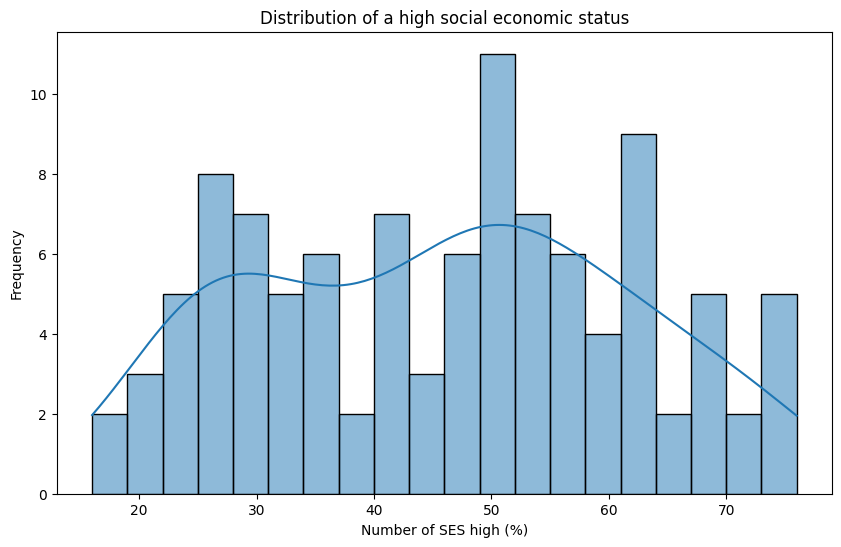

In [13]:
# Example: Histogram of households high social economic status
plt.figure(figsize=(10, 6))
sns.histplot(merge_dataframe['SES high (%)'], bins=20, kde=True)
plt.title('Distribution of a high social economic status')
plt.xlabel('Number of SES high (%)')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Linear Regression Analysis (to explore relationships)
import statsmodels.api as sm

#select the independent variables
x = merge_dataframe[['Average number of residents', 'SES high (%)', 
           'Migration background: % none', 'Migration background: % European (excl the Netherlands)', 
           'Households: % with children', 'Health care facilities per 1.000 residents']]
#select the dependent variables
y = merge_dataframe['Living space: % 100 m2+']

# Add a constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     Living space: % 100 m2+   R-squared:                       0.540
Model:                                 OLS   Adj. R-squared:                  0.512
Method:                      Least Squares   F-statistic:                     19.21
Date:                     Wed, 16 Oct 2024   Prob (F-statistic):           1.09e-14
Time:                             12:43:17   Log-Likelihood:                -402.82
No. Observations:                      105   AIC:                             819.6
Df Residuals:                           98   BIC:                             838.2
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

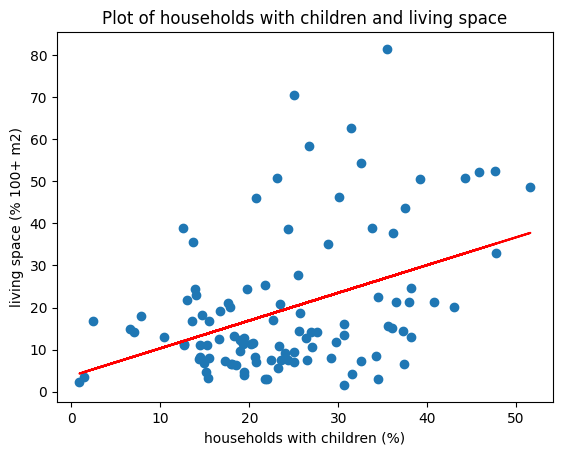

In [25]:
#Visual plot of the correlation of households with children and living space bigger than 100 m2  

# extract the data for x and y
x = merge_dataframe['Households: % with children']  
y = merge_dataframe['Living space: % 100 m2+']  

# Make the scatterplot
plt.scatter(x, y)

# Plot the trendline
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', label=f'Trendline: y = {m:.2f}x + {b:.2f}')

# Add a title and labels to the plot
plt.title("Plot of households with children and living space")
plt.xlabel("households with children (%)")
plt.ylabel("living space (% 100+ m2)")

# Show the scatterplot
plt.show()


# Also apparent from our correlation table, there is a possitive correlation between living space larger than 100 m2 and households with children. This makes sence, since you would need more living space when you have children

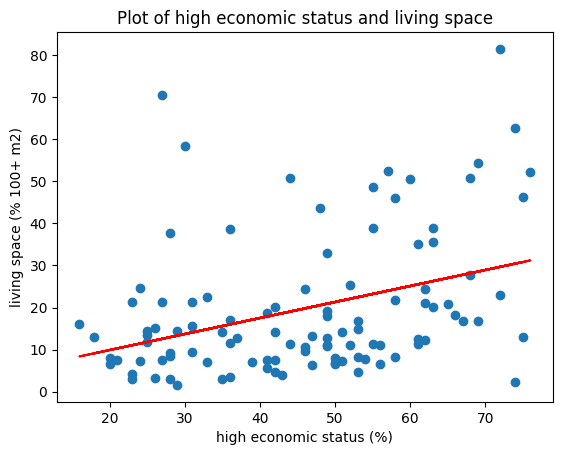

In [26]:
#Visual plot of the correlation of high economic status and living space bigger than 100 m2  

# extract the data for x and y
x = merge_dataframe['SES high (%)']  
y = merge_dataframe['Living space: % 100 m2+']  

# Make the scatterplot
plt.scatter(x, y)

# Plot the trendline
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', label=f'Trendline: y = {m:.2f}x + {b:.2f}')

# Add a title and labels to the plot
plt.title("Plot of high economic status and living space")
plt.xlabel("high economic status (%)")
plt.ylabel("living space (% 100+ m2)")

# Show the scatterplot
plt.show()

# There is also a positive correlation between high economic status and living space larger than 100 m2. This makes sense as well, since when you have a higher income, you can afford a larger living space.

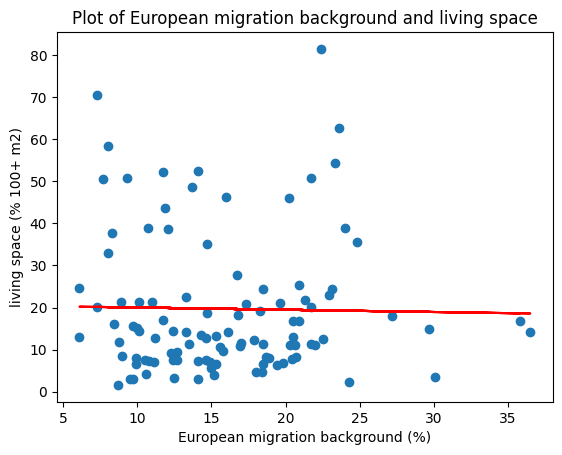

In [29]:
#Visual plot of the correlation of European migration background and living space bigger than 100 m2  

# extract the data for x and y
x = merge_dataframe['Migration background: % European (excl the Netherlands)']  
y = merge_dataframe['Living space: % 100 m2+']  

# Make the scatterplot
plt.scatter(x, y)

# Plot the trendline
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', label=f'Trendline: y = {m:.2f}x + {b:.2f}')

# Add a title and labels to the plot
plt.title("Plot of European migration background and living space")
plt.xlabel("European migration background (%)")
plt.ylabel("living space (% 100+ m2)")

# Show the scatterplot
plt.show()

# As also readable in our correlation model, there isn't much correlation between european migration background and living space bigger than 100 m2. This is also viseable in the scatterplot below. 

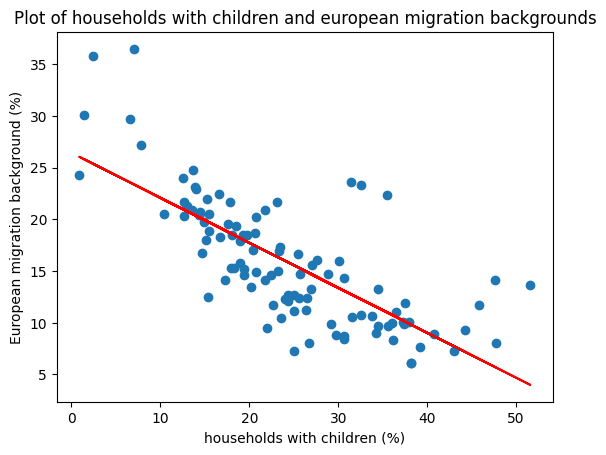

In [31]:
# households without children and european background 

# extract the data for x and y
x = merge_dataframe['Households: % with children']  
y = merge_dataframe['Migration background: % European (excl the Netherlands)']  

# Make the scatterplot
plt.scatter(x, y)

# Plot the trendline
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', label=f'Trendline: y = {m:.2f}x + {b:.2f}')

# Add a title and labels to the plot
plt.title("Plot of households with children and european migration backgrounds")
plt.xlabel("households with children (%)")
plt.ylabel("European migration background (%)")

# Show the scatterplot
plt.show()

# Not really relevant to our research question, but from our correlation table we were able to see that the strongest correlation was between households with children and european migration background.
# This correlation is negative, which means that the more households with children, the fewer people with european migration background.
# it could be explained by the fact that a lot of european migrants are probably expats and young urban professionals, and so these aren't people with children/families, so the more of those living in a neighborhood, the fewer families live here. 
